In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 52ms/step - loss: 0.6927 - accuracy: 0.5375 - val_loss: 0.6919 - val_accuracy: 0.5764
Epoch 2/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6904 - accuracy: 0.5932 - val_loss: 0.6885 - val_accuracy: 0.6420
Epoch 3/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6822 - accuracy: 0.6382 - val_loss: 0.6726 - val_accuracy: 0.5826
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6358 - accuracy: 0.6760 - val_loss: 0.6071 - val_accuracy: 0.7320
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5903 - accuracy: 0.7423 - val_loss: 0.5827 - val_accuracy: 0.7400
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5682 - accuracy: 0.7551 - val_loss: 0.5633 - val_accuracy: 0.7600
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5492 - accuracy: 0.7656 - val_loss: 0.5467 - val_ac

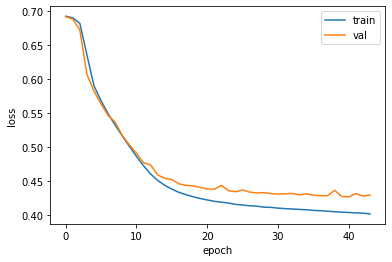

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 77ms/step - loss: 0.6927 - accuracy: 0.5311 - val_loss: 0.6921 - val_accuracy: 0.5820
Epoch 2/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6910 - accuracy: 0.5949 - val_loss: 0.6900 - val_accuracy: 0.6290
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6880 - accuracy: 0.6299 - val_loss: 0.6859 - val_accuracy: 0.6566
Epoch 4/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6814 - accuracy: 0.6525 - val_loss: 0.6764 - val_accuracy: 0.6760
Epoch 5/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6638 - accuracy: 0.6794 - val_loss: 0.6454 - val_accuracy: 0.7042
Epoch 6/100
313/313 [==============================] - 17s 56ms/step - loss: 0.6036 - accuracy: 0.7175 - val_loss: 0.5700 - val_accuracy: 0.7338
Epoch 7/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5581 - accuracy: 0.7376 - val_loss: 0.5460 - val_ac

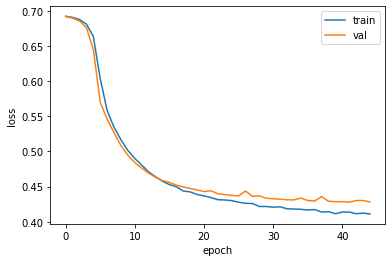

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(9, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 9)                 648       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 9,458
Trainable params: 9,458
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 32s 88ms/step - loss: 0.6930 - accuracy: 0.5203 - val_loss: 0.6929 - val_accuracy: 0.4964
Epoch 2/100
313/313 [==============================] - 27s 85ms/step - loss: 0.6922 - accuracy: 0.5305 - val_loss: 0.6914 - val_accuracy: 0.5880
Epoch 3/100
313/313 [==============================] - 27s 86ms/step - loss: 0.6887 - accuracy: 0.5879 - val_loss: 0.6847 - val_accuracy: 0.6224
Epoch 4/100
313/313 [==============================] - 26s 85ms/step - loss: 0.6694 - accuracy: 0.6130 - val_loss: 0.6465 - val_accuracy: 0.6546
Epoch 5/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6128 - accuracy: 0.6875 - val_loss: 0.5887 - val_accuracy: 0.7158
Epoch 6/100
313/313 [==============================] - 26s 84ms/step - loss: 0.5679 - accuracy: 0.7254 - val_loss: 0.5533 - val_accuracy: 0.7328
Epoch 7/100
313/313 [==============================] - 26s 83ms/step - loss: 0.5423 - accuracy: 0.7405 - val_loss: 0.5294 - val_ac

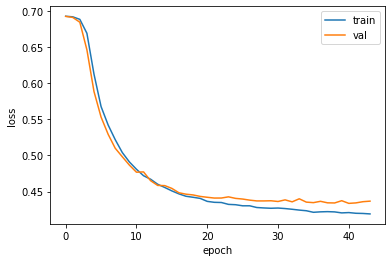

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 49ms/step - loss: 0.6927 - accuracy: 0.5166 - val_loss: 0.6919 - val_accuracy: 0.5472
Epoch 2/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6909 - accuracy: 0.5653 - val_loss: 0.6900 - val_accuracy: 0.5762
Epoch 3/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6881 - accuracy: 0.5904 - val_loss: 0.6868 - val_accuracy: 0.5850
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6834 - accuracy: 0.6080 - val_loss: 0.6811 - val_accuracy: 0.6050
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6754 - accuracy: 0.6234 - val_loss: 0.6717 - val_accuracy: 0.6128
Epoch 6/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6617 - accuracy: 0.6409 - val_loss: 0.6560 - val_accuracy: 0.6328
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6385 - accuracy: 0.6658 - val_loss: 0.6271 - val_ac

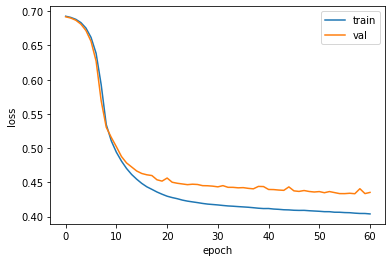

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 15ms/step - loss: 0.4279 - accuracy: 0.7999


[0.4279460906982422, 0.7999200224876404]